# Import Packages

In [1]:
import json
import os
import pandas as pd
import numpy as np
import pychartjs
from datetime import datetime 
import matplotlib.pyplot as plt
import re
import altair as alt
import seaborn as sns
from matplotlib.pyplot import figure

# Load Data

In [2]:
output_dir = "output_data/"
file = "response3.pki"
raw_data = pd.read_pickle(output_dir + file)
raw_data = raw_data[["time", "Log ID", "Machine ID", "command", "stderr", "stdout"]]
raw_data

,time,Log ID,Machine ID,command,stderr,stdout
0,2021-04-19 19:34:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,ls,,SuperShell\nstderr.txt
1,2021-04-19 19:35:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,
2,2021-04-19 19:35:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,
3,2021-04-19 19:36:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,export,,
4,2021-04-19 19:36:00,490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519...,10bcd15c,export,,
...,...,...,...,...,...,...
468,2021-04-17 19:57:00,00206cd4bdc39bab7e2908eb900370094d721883f30148...,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,ls,,_15881.env\n_15881.variables\nfastx_out\nfx486...
469,2021-04-17 19:57:00,00206cd4bdc39bab7e2908eb900370094d721883f30148...,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,cd,,
470,2021-04-17 19:57:00,00206cd4bdc39bab7e2908eb900370094d721883f30148...,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,ls,,job-48632\njob-48633\njob-48634\njob-48635\njo...
471,2021-04-17 19:57:00,00206cd4bdc39bab7e2908eb900370094d721883f30148...,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,pwd,,/home/jovyan/DNASubway/project-5974


In [3]:
raw_data.describe()

<ipython-input-3-7a57e84b5e52>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.describe()


,time,Log ID,Machine ID,command,stderr,stdout
count,473,473,473,473,473,473
unique,166,9,7,31,44,140
top,2021-04-19 13:20:00,8067d36662ba1f8b6d7e2281fb338c35f016d2f2e72b2e...,a80ca,ls,,
freq,13,187,187,165,423,222
first,2021-04-16 13:38:00,NaN,NaN,NaN,NaN,NaN
last,2022-09-29 19:00:00,NaN,NaN,NaN,NaN,NaN


In [4]:
print(raw_data["Log ID"].unique())

['490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519e3a41d8fbd2f2af05e'
 '33bb76e6130caab90d89f35542de42c1be3a0f364190f6e3645cd8f03613c1ab'
 '8067d36662ba1f8b6d7e2281fb338c35f016d2f2e72b2e09bb010bd323e89970'
 '2f3c04c9be3cc02268104e419f0c962bc674e4e7411c8c0f67b34f11f89fc398'
 'd255305150a0d892434887745e969de6e48e7d48bc7f84a362951001d7f6c31c'
 '8a0d5bed0152303242b9094ce32098e117fc8f1a7169e69df2cee99ad9d8ec3c'
 '586def0e79609c5554f12ed168ac1962c0d12e7d9ef87a91fdd02406c65dcd24'
 '0f26ab18818b468595373cc657917cfbbedacc14b7d4ff041a49b0aeb5a2f4c6'
 '00206cd4bdc39bab7e2908eb900370094d721883f30148868ba32abb8cdf28b3']


In [5]:
raw_data['Log ID'] = raw_data['Log ID'].replace({'490cd3ad601e875614199fc11aa5ebe2ad67d289cbe519e3a41d8fbd2f2af05e':'User_1', '33bb76e6130caab90d89f35542de42c1be3a0f364190f6e3645cd8f03613c1ab': 'User_2', '8067d36662ba1f8b6d7e2281fb338c35f016d2f2e72b2e09bb010bd323e89970': 'User_3', '2f3c04c9be3cc02268104e419f0c962bc674e4e7411c8c0f67b34f11f89fc398': 'User_4', 'd255305150a0d892434887745e969de6e48e7d48bc7f84a362951001d7f6c31c': 'User_5', '8a0d5bed0152303242b9094ce32098e117fc8f1a7169e69df2cee99ad9d8ec3c': 'User_6', '586def0e79609c5554f12ed168ac1962c0d12e7d9ef87a91fdd02406c65dcd24': 'User_7', '0f26ab18818b468595373cc657917cfbbedacc14b7d4ff041a49b0aeb5a2f4c6': 'User_8', '00206cd4bdc39bab7e2908eb900370094d721883f30148868ba32abb8cdf28b3': 'User_9'})
raw_data.rename(columns={'Log ID': 'User Name'}, inplace=True)
raw_data.head()

,time,User Name,Machine ID,command,stderr,stdout
0,2021-04-19 19:34:00,User_1,10bcd15c,ls,,SuperShell\nstderr.txt
1,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,
2,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,
3,2021-04-19 19:36:00,User_1,10bcd15c,export,,
4,2021-04-19 19:36:00,User_1,10bcd15c,export,,


# Pandas Processing

## Error frequency

In [6]:
r = re.compile(r'.*((N|n)o).*')

In [7]:
r = re.compile(r'(\w)+')

In [8]:
raw_data["error"] = raw_data.stderr.apply(lambda x: bool(r.match(x)))
raw_data

,time,User Name,Machine ID,command,stderr,stdout,error
0,2021-04-19 19:34:00,User_1,10bcd15c,ls,,SuperShell\nstderr.txt,False
1,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,,False
2,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,,False
3,2021-04-19 19:36:00,User_1,10bcd15c,export,,,False
4,2021-04-19 19:36:00,User_1,10bcd15c,export,,,False
...,...,...,...,...,...,...,...
468,2021-04-17 19:57:00,User_9,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,ls,,_15881.env\n_15881.variables\nfastx_out\nfx486...,False
469,2021-04-17 19:57:00,User_9,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,cd,,,False
470,2021-04-17 19:57:00,User_9,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,ls,,job-48632\njob-48633\njob-48634\njob-48635\njo...,False
471,2021-04-17 19:57:00,User_9,612c4dc4-ce35-4571-952d-cfedc92809d3-5fbf7c6db6-n,pwd,,/home/jovyan/DNASubway/project-5974,False


In [9]:
selected_data = raw_data[["time", "User Name", "command", "error"]]
selected_data

,time,User Name,command,error
0,2021-04-19 19:34:00,User_1,ls,False
1,2021-04-19 19:35:00,User_1,export,False
2,2021-04-19 19:35:00,User_1,export,False
3,2021-04-19 19:36:00,User_1,export,False
4,2021-04-19 19:36:00,User_1,export,False
...,...,...,...,...
468,2021-04-17 19:57:00,User_9,ls,False
469,2021-04-17 19:57:00,User_9,cd,False
470,2021-04-17 19:57:00,User_9,ls,False
471,2021-04-17 19:57:00,User_9,pwd,False


In [10]:
groupby_user = selected_data.groupby('User Name')['error'].mean()
groupby_user

User Name
User_1    0.000000
User_2    0.000000
User_3    0.117647
User_4    0.008850
User_5    0.000000
User_6    0.000000
User_7    0.000000
User_8    0.000000
User_9    0.075758
Name: error, dtype: float64

In [11]:
groupby_command = selected_data.groupby('command')['error'].mean()
groupby_command

command
EchoCounts                  0.000000
cat                         0.322581
cd                          0.000000
chmod                       0.000000
clear                       0.000000
cp                          0.500000
diff                        0.166667
directory_grep_head_tail    0.000000
echo                        0.000000
export                      0.000000
fastq_quality_filter        0.000000
fastx_trimmer               0.000000
grep_head_tail              0.000000
gunzip                      0.000000
hello.txt                   0.000000
hello_goodbye.txt           0.000000
history                     0.000000
hostname                    0.000000
ll                          0.000000
ln                          0.375000
ls                          0.078788
mkdir                       0.000000
mv                          0.333333
nano                        0.000000
pico                        0.000000
print                       1.000000
printf                      0.

### Plot frequency of error by user

In [12]:
selected_data["error"] = selected_data["error"].astype(int)
selected_data

<ipython-input-12-57a08604f9b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["error"] = selected_data["error"].astype(int)


,time,User Name,command,error
0,2021-04-19 19:34:00,User_1,ls,0
1,2021-04-19 19:35:00,User_1,export,0
2,2021-04-19 19:35:00,User_1,export,0
3,2021-04-19 19:36:00,User_1,export,0
4,2021-04-19 19:36:00,User_1,export,0
...,...,...,...,...
468,2021-04-17 19:57:00,User_9,ls,0
469,2021-04-17 19:57:00,User_9,cd,0
470,2021-04-17 19:57:00,User_9,ls,0
471,2021-04-17 19:57:00,User_9,pwd,0


In [13]:
error_frequency_user = []
for i in range(9):
    name = "User_" + str(i+1)
    frequency = selected_data[selected_data["User Name"] == name]["error"].mean()
    to_add = {
        "User Name": name, 
        "frequency": frequency
    }
    error_frequency_user.append(to_add)

error_frequency_user[0:3]

[{'User Name': 'User_1', 'frequency': 0.0},
 {'User Name': 'User_2', 'frequency': 0.0},
 {'User Name': 'User_3', 'frequency': 0.11764705882352941}]

In [14]:
error_frequency_user_table = pd.DataFrame(error_frequency_user)
error_frequency_user_table

,User Name,frequency
0,User_1,0.000000
1,User_2,0.000000
2,User_3,0.117647
3,User_4,0.008850
4,User_5,0.000000
5,User_6,0.000000
6,User_7,0.000000
7,User_8,0.000000
8,User_9,0.075758


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

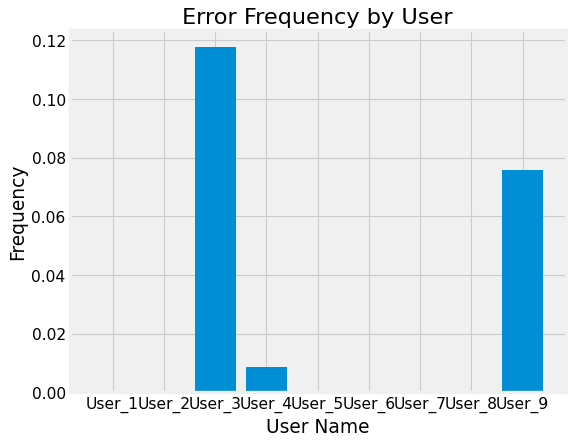

In [15]:
figure(figsize=(8, 6), dpi=80)
plt.style.use("fivethirtyeight")
plt.title("Error Frequency by User")
plt.xlabel("User Name")
plt.ylabel("Frequency")
plt.bar(error_frequency_user_table["User Name"], error_frequency_user_table["frequency"])
plt.tight_layout

## Error Type

In [16]:
error_type_data = raw_data.copy()
error_type_data.head()

,time,User Name,Machine ID,command,stderr,stdout,error
0,2021-04-19 19:34:00,User_1,10bcd15c,ls,,SuperShell\nstderr.txt,False
1,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,,False
2,2021-04-19 19:35:00,User_1,10bcd15c,export,/home/supershell/.offline.sh: line 358: export...,,False
3,2021-04-19 19:36:00,User_1,10bcd15c,export,,,False
4,2021-04-19 19:36:00,User_1,10bcd15c,export,,,False


In [17]:
error_type_data = error_type_data[["time", "User Name", "command", "stderr"]]
error_type_data.head()

,time,User Name,command,stderr
0,2021-04-19 19:34:00,User_1,ls,
1,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...
2,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...
3,2021-04-19 19:36:00,User_1,export,
4,2021-04-19 19:36:00,User_1,export,


In [18]:
permission = re.compile(r'.*((P|p)ermission).*')
access_issue = re.compile(r'.*((A|a)ccess).*')
command_error = re.compile(r'.*((C|c)ommand).*')
typo_file_name = re.compile(r'.*((F|f)ile).*')
typo_directory_name = re.compile(r'.*((D|d)irectory).*')

In [19]:
def error_type(error):
    if permission.match(error):
        return "Permission Error"
    elif access_issue.match(error): 
        return "Access Error"
    elif command_error.match(error):
        return "Command Error"
    elif typo_file_name.match(error):
        return "File Name Typo"
    elif typo_directory_name.match(error):
        return "Directory Name Typo"
    else:
        return "No Error"

In [20]:
error_type_data["error type"] = error_type_data["stderr"].apply(lambda x: error_type(x))
error_type_data.head(100)

,time,User Name,command,stderr,error type
0,2021-04-19 19:34:00,User_1,ls,,No Error
1,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...,No Error
2,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...,No Error
3,2021-04-19 19:36:00,User_1,export,,No Error
4,2021-04-19 19:36:00,User_1,export,,No Error
...,...,...,...,...,...
95,2022-09-11 19:52:00,User_3,cd,,No Error
96,2022-09-11 19:52:00,User_3,ls,,No Error
97,2022-09-11 19:53:00,User_3,cd,,No Error
98,2022-09-11 19:53:00,User_3,ls,,No Error


In [21]:
error_type_data["error type"].value_counts()

No Error               429
File Name Typo          20
Access Error            13
Directory Name Typo      6
Command Error            4
Permission Error         1
Name: error type, dtype: int64

### Error Type Per User

In [22]:
for i in range(9):
    user_name = "User_" + str(i+1)
    print(user_name)
    print(error_type_data.loc[error_type_data["User Name"] == user_name]["error type"].value_counts(normalize=True))

User_1
No Error    1.0
Name: error type, dtype: float64
User_2
No Error    1.0
Name: error type, dtype: float64
User_3
No Error               0.834225
Access Error           0.064171
File Name Typo         0.064171
Directory Name Typo    0.021390
Command Error          0.010695
Permission Error       0.005348
Name: error type, dtype: float64
User_4
No Error               0.964602
Directory Name Typo    0.017699
File Name Typo         0.017699
Name: error type, dtype: float64
User_5
No Error    1.0
Name: error type, dtype: float64
User_6
No Error    1.0
Name: error type, dtype: float64
User_7
No Error    1.0
Name: error type, dtype: float64
User_8
No Error    1.0
Name: error type, dtype: float64
User_9
No Error          0.931818
File Name Typo    0.045455
Command Error     0.015152
Access Error      0.007576
Name: error type, dtype: float64


### User 3

In [23]:
user_3 = error_type_data.loc[error_type_data["User Name"] == "User_3"]["error type"].value_counts()
label = ["No Error", "File Name Typo", "Access Error", "Directory Name Typo", "Command Error", "Permission Error"]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

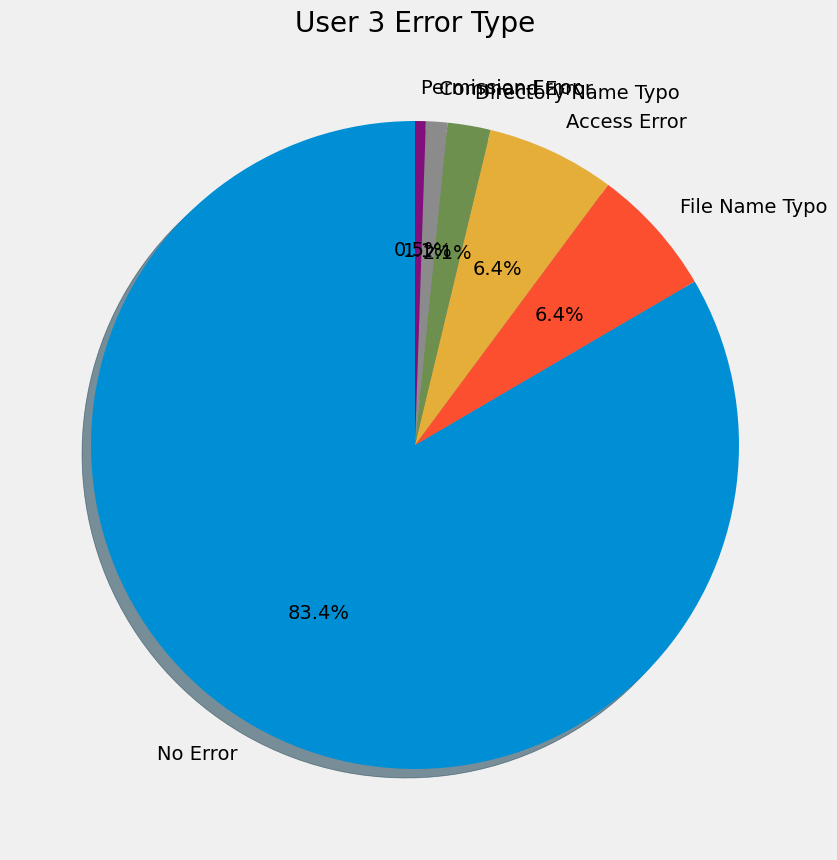

In [24]:
figure(figsize=(10, 10), dpi=100)
plt.style.use("fivethirtyeight")
plt.pie(user_3, labels=label, shadow=True, startangle=90, autopct='%1.1f%%')
plt.title("User 3 Error Type")
plt.tight_layout


## Error Type - detour

In [191]:
unique_error = raw_data.copy()
unique_error = unique_error[["time", "User Name", "command", "stderr"]]
unique_error.head(5)

,time,User Name,command,stderr
0,2021-04-19 19:34:00,User_1,ls,
1,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...
2,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...
3,2021-04-19 19:36:00,User_1,export,
4,2021-04-19 19:36:00,User_1,export,


In [192]:
filter = (unique_error["stderr"] != "")

In [193]:
unique_error = unique_error[filter]
unique_error.head(30)

,time,User Name,command,stderr
1,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...
2,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...
18,2022-09-11 18:27:00,User_3,ls,ls: cannot access '/home/jovyan/RNA_SEQ_SAMPLE...
22,2022-09-11 18:28:00,User_3,ls,ls: cannot access '/gunings/RNA_SEQ_SAMPLES': ...
29,2022-09-11 18:30:00,User_3,cd,/home/jovyan/.offline.sh: line 344: cd: sdgeor...
36,2022-09-11 18:33:00,User_3,ls,"ls: cannot access 'stdout,txt.': No such file ..."
38,2022-09-11 18:35:00,User_3,ls,ls: cannot access 'RNAt': No such file or dire...
39,2022-09-11 18:37:00,User_3,ls,ls: cannot access 'RNA': No such file or direc...
40,2022-09-11 18:37:00,User_3,ls,ls: cannot access 'RNA^t': No such file or dir...
41,2022-09-11 18:51:00,User_3,ls,ls: cannot access 'RNA^t': No such file or dir...


**Expand cell if there are multiple errors in the same command**

In [194]:
def error_splitter(errors):
    return errors.splitlines()

In [196]:
unique_error["error list"] = unique_error["stderr"].apply(lambda x: error_splitter(x))
unique_error_2 = unique_error.copy()
unique_error_2.head()


,time,User Name,command,stderr,error list
1,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...,[/home/supershell/.offline.sh: line 358: expor...
2,2021-04-19 19:35:00,User_1,export,/home/supershell/.offline.sh: line 358: export...,[/home/supershell/.offline.sh: line 358: expor...
18,2022-09-11 18:27:00,User_3,ls,ls: cannot access '/home/jovyan/RNA_SEQ_SAMPLE...,[ls: cannot access '/home/jovyan/RNA_SEQ_SAMPL...
22,2022-09-11 18:28:00,User_3,ls,ls: cannot access '/gunings/RNA_SEQ_SAMPLES': ...,[ls: cannot access '/gunings/RNA_SEQ_SAMPLES':...
29,2022-09-11 18:30:00,User_3,cd,/home/jovyan/.offline.sh: line 344: cd: sdgeor...,[/home/jovyan/.offline.sh: line 344: cd: sdgeo...


In [197]:
def error_expander(row):
    new = []
    error_list = row["error list"]
    if (len(error_list) <= 1):
        return new
    else:
        for error in error_list:
            time = row["time"]
            user_name = row["User Name"]
            command = row["command"]
            to_add = {
                "time": time,
                "User Name": user_name,
                "command": command,
                "stderr": error,
                "error list": error_list
            }
            new.append(to_add)
        return new

In [215]:
rows = unique_error.apply(lambda x: error_expander(x), axis=1)

new = []
for row in rows:
    if (len(row) > 0):
        for i in range(len(row)):
            if (i > 0):
                new.append(row[i])

new[0:2]

[{'time': Timestamp('2022-09-11 19:17:00'),
  'User Name': 'User_3',
  'command': 'ls',
  'stderr': "ls: cannot access 'stdout.txt': No such file or directory",
  'error list': ["ls: cannot access '–l': No such file or directory",
   "ls: cannot access 'stdout.txt': No such file or directory"]},
 {'time': Timestamp('2022-09-13 13:32:00'),
  'User Name': 'User_3',
  'command': 'cat',
  'stderr': 'cat: cat: No such file or directory',
  'error list': ['cat: goodbye.txt: No such file or directory',
   'cat: cat: No such file or directory']}]

In [232]:
new_frame = pd.DataFrame.from_records(new)
error_expand = pd.concat([unique_error, new_frame], ignore_index=True)
error_expand.sort_values(by=['time'], inplace=True)
error_expand.reset_index(drop=True, inplace=True)
error_expand.head(20)

,time,User Name,command,stderr,error list,no name
0,2021-04-16 18:43:00,User_9,print,"Error: no such file ""*n""","[Error: no such file ""*n""]",None
1,2021-04-16 22:55:00,User_9,cat,cat: misc_child/goodbye.txt: Too many levels o...,[cat: misc_child/goodbye.txt: Too many levels ...,cat: $: Too many levels of symbolic links
2,2021-04-16 22:55:00,User_9,ll,/home/jovyan/.offline.sh: line 358: ll: comman...,[/home/jovyan/.offline.sh: line 358: ll: comma...,PATH: ll: command not found
3,2021-04-16 22:56:00,User_9,ll,/home/jovyan/.offline.sh: line 358: ll: comman...,[/home/jovyan/.offline.sh: line 358: ll: comma...,PATH: ll: command not found
4,2021-04-16 22:56:00,User_9,ls,ls: cannot access 'misch_child/goodbye.txt': N...,[ls: cannot access 'misch_child/goodbye.txt': ...,ls: cannot access $: No such file or directory
5,2021-04-16 22:56:00,User_9,cat,cat: goodbye.txt: Too many levels of symbolic ...,[cat: goodbye.txt: Too many levels of symbolic...,cat: $: Too many levels of symbolic links
6,2021-04-16 23:13:00,User_9,cat,cat: '!!!!': No such file or directory,[cat: '!!!!': No such file or directory],cat: $: No such file or directory
7,2021-04-16 23:19:00,User_9,diff,diff: goodbye.text: No such file or directory,[diff: goodbye.text: No such file or directory],diff: $: No such file or directory
8,2021-04-16 23:34:00,User_9,diff,diff: linked_goodbye.txt: No such file or dire...,[diff: linked_goodbye.txt: No such file or dir...,diff: $: No such file or directory
9,2021-04-16 23:36:00,User_9,mv,mv: 'link_goodbye.txt' and 'link_goodbye.txt' ...,[mv: 'link_goodbye.txt' and 'link_goodbye.txt'...,mv: $ are the same file


**First level error type count**

In [233]:
pd.unique(error_expand["stderr"])
unique_error_total = len(pd.unique(error_expand["stderr"]))
print(unique_error_total)

50


> There are 50 unique errors

**Second level error type count**

replace file names and directory names with $

In [218]:
file_name_replacer = re.compile(r'.+(\').+(\').+')
file_name = re.compile(r'(\').+(\')')

In [219]:
path_replacer = re.compile(r'.*(\/).+(: line )(\d+).*')
path_name = re.compile(r'(\/).+(: line )(\d+)')

In [220]:
name_between_colon = re.compile(r'.+(:).+(:).+')
colon_name = re.compile(r'(:).+(:)')

In [221]:
cd_replacer = re.compile(r'.*cd:(.+):.*')
cd_name = re.compile(r'cd:(.+):')

In [222]:
def replacer(error):
    if file_name_replacer.match(error):
        return re.sub(file_name, '$', error)
    elif path_replacer.match(error):
        error = re.sub(path_name, 'PATH', error)
        if file_name_replacer.match(error):
            return re.sub(file_name, '$', error)
        elif cd_replacer.match(error):
            return re.sub(cd_name, 'cd: $:', error)
        else:
            return error
    elif name_between_colon.match(error):
        return re.sub(colon_name, ': $:', error)

In [234]:
error_expand["no name"] = error_expand["stderr"].apply(lambda x: replacer(x))
error_expand.head(50)

,time,User Name,command,stderr,error list,no name
0,2021-04-16 18:43:00,User_9,print,"Error: no such file ""*n""","[Error: no such file ""*n""]",None
1,2021-04-16 22:55:00,User_9,cat,cat: misc_child/goodbye.txt: Too many levels o...,[cat: misc_child/goodbye.txt: Too many levels ...,cat: $: Too many levels of symbolic links
2,2021-04-16 22:55:00,User_9,ll,/home/jovyan/.offline.sh: line 358: ll: comman...,[/home/jovyan/.offline.sh: line 358: ll: comma...,PATH: ll: command not found
3,2021-04-16 22:56:00,User_9,ll,/home/jovyan/.offline.sh: line 358: ll: comman...,[/home/jovyan/.offline.sh: line 358: ll: comma...,PATH: ll: command not found
4,2021-04-16 22:56:00,User_9,ls,ls: cannot access 'misch_child/goodbye.txt': N...,[ls: cannot access 'misch_child/goodbye.txt': ...,ls: cannot access $: No such file or directory
5,2021-04-16 22:56:00,User_9,cat,cat: goodbye.txt: Too many levels of symbolic ...,[cat: goodbye.txt: Too many levels of symbolic...,cat: $: Too many levels of symbolic links
6,2021-04-16 23:13:00,User_9,cat,cat: '!!!!': No such file or directory,[cat: '!!!!': No such file or directory],cat: $: No such file or directory
7,2021-04-16 23:19:00,User_9,diff,diff: goodbye.text: No such file or directory,[diff: goodbye.text: No such file or directory],diff: $: No such file or directory
8,2021-04-16 23:34:00,User_9,diff,diff: linked_goodbye.txt: No such file or dire...,[diff: linked_goodbye.txt: No such file or dir...,diff: $: No such file or directory
9,2021-04-16 23:36:00,User_9,mv,mv: 'link_goodbye.txt' and 'link_goodbye.txt' ...,[mv: 'link_goodbye.txt' and 'link_goodbye.txt'...,mv: $ are the same file


In [235]:
unique_error_total_2 = len(pd.unique(error_expand["no name"]))
print(unique_error_total_2)

25


In [236]:
error_expand["no name"].value_counts()

ls: cannot access $: No such file or directory                                                                                                                                                                                                                                                                                        13
cat: $: No such file or directory                                                                                                                                                                                                                                                                                                      9
PATH: cd: $: No such file or directory                                                                                                                                                                                                                                                                                                 8
PATH: ll: com

> Level 2 groupings find that there are 25 unique errors.

**Third level of grouping**

In [228]:
command_not_find = re.compile(r'.*(command not found).*')
wrong_file_name = re.compile(r'.*(No such file or directory).*')
wrong_command_directory = re.compile(r'.*()')

## Questions and thoughts

> how can I distinguish the error is a typo if many errors are file or directory name not found

> how to suggest help